# Data exploration - gas prices for the top Rollups

#### Maria Silva, August 2024

In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KernelDensity

In [2]:
data_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "data"))

In [3]:
paper_template = dict(
    layout=go.Layout(
        template="simple_white",
        font=dict(size=14, family="Clear Sans"),
        margin=go.layout.Margin(
            l=40,  # left margin
            r=40,  # right margin
            b=40,  # bottom margin
            t=40,  # top margin
        ),
        width=700,
        xaxis=dict(
            automargin=True, minor_ticks="inside", showgrid=True, griddash="dash", minor_griddash="dot"
        ),
        yaxis=dict(
            automargin=True, minor_ticks="inside", showgrid=True, griddash="dash", minor_griddash="dot"
        ),
        )
)

## Data overview

In [4]:
file_path = os.path.join(data_dir, "dune_gas_fee_stats.csv")
gas_stats_df = pd.read_csv(file_path).set_index("blockchain")
gas_stats_df.T

blockchain,arbitrum,zksync,base,optimism
avg_gas_price_gwei,0.058315,0.027847,0.101286,0.134715
std_gas_price_gwei,0.744841,0.014077,4.860721,2.640377
min_gas_price_gwei,0.010000,0.000000,0.000000,0.000000
percentile_10_gas_price_gwei,0.010000,0.025000,0.002991,0.001082
median_gas_price_gwei,0.010000,0.025000,0.011049,0.060780
percentile_90_gas_price_gwei,0.014090,0.043417,0.102554,0.152641
percentile_95_gas_price_gwei,0.034022,0.045250,0.165401,0.307806
percentile_99_gas_price_gwei,0.518523,0.045250,1.124969,2.043655
max_gas_price_gwei,34.929658,3.040897,7246.744400,5473.723391


In [5]:
file_path = os.path.join(data_dir, "dune_gas_fee_dist.csv")
gas_dist_df = pd.read_csv(file_path)
gas_dist_df.head()

,blockchain,bucket,bucket_lower_bound,bucket_upper_bound,bucket_cnt
0,zksync,1,0.000000,0.000000,1
1,base,1,0.000000,0.001131,6285849
2,optimism,1,0.000000,0.002048,9418094
3,optimism,2,0.002048,0.004096,2606188
4,base,2,0.001131,0.002261,11421219


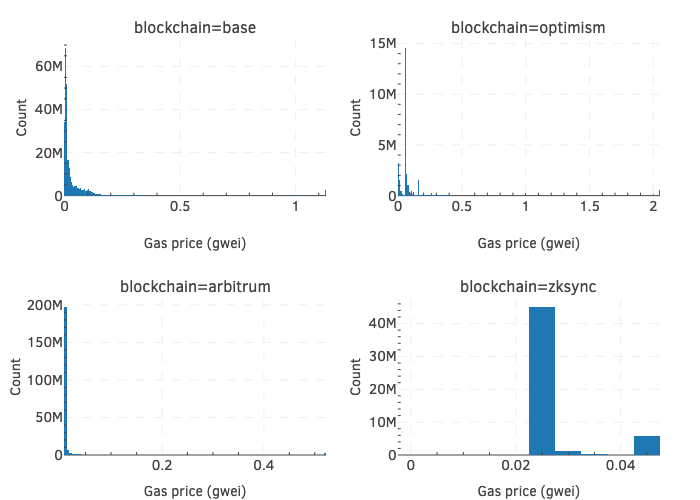

In [6]:
fig = px.histogram(gas_dist_df, x="bucket_lower_bound", y="bucket_cnt", histfunc='sum', nbins=500, template=paper_template,
                   facet_col="blockchain", facet_col_wrap=2, facet_row_spacing=0.25, facet_col_spacing=0.12,
                   category_orders={"blockchain": ["base", "optimism", "arbitrum", "zksync"]})
fig.update_xaxes(matches=None, showticklabels=True, title_text="Gas price (gwei)", title_font_size=14)
fig.update_yaxes(matches=None, showticklabels=True, title_text="Count", title_font_size=14)
fig.update_annotations(font_size=16)
fig.show('png')

## Fit empirical distribution

### Base

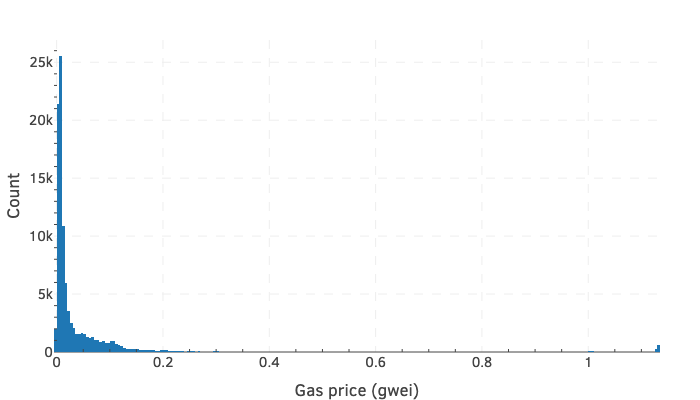

In [7]:
base_df = gas_dist_df[gas_dist_df["blockchain"]=="base"]
X = base_df["bucket_lower_bound"].values.reshape(-1, 1)
bandwidth = base_df["bucket_lower_bound"].diff().mean()
weights = base_df["bucket_cnt"].values
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X, sample_weight=weights)
samples = kde.sample(100000)

fig = px.histogram(samples, nbins=500, template=paper_template, height=400)
fig.update_layout(xaxis_title="Gas price (gwei)", yaxis_title="Count", showlegend=False)

fig.show('png')


### Optimism

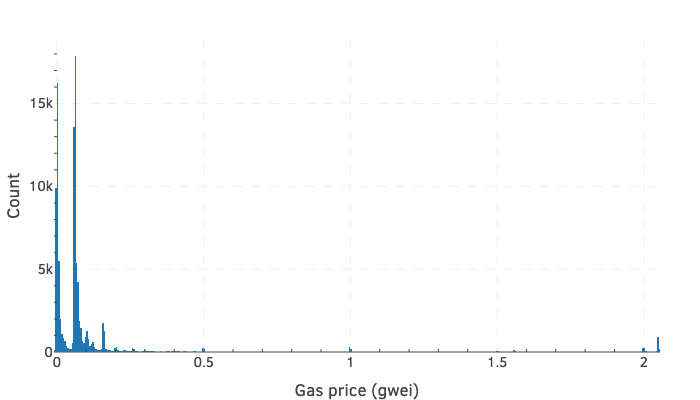

In [8]:
op_df = gas_dist_df[gas_dist_df["blockchain"]=="optimism"]
X = op_df["bucket_lower_bound"].values.reshape(-1, 1)
bandwidth = op_df["bucket_lower_bound"].diff().mean()
weights = op_df["bucket_cnt"].values
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X, sample_weight=weights)
samples = kde.sample(100000)

fig = px.histogram(samples, nbins=500, template=paper_template, height=400)
fig.update_layout(xaxis_title="Gas price (gwei)", yaxis_title="Count", showlegend=False)

fig.show('png')


### Arbitrum

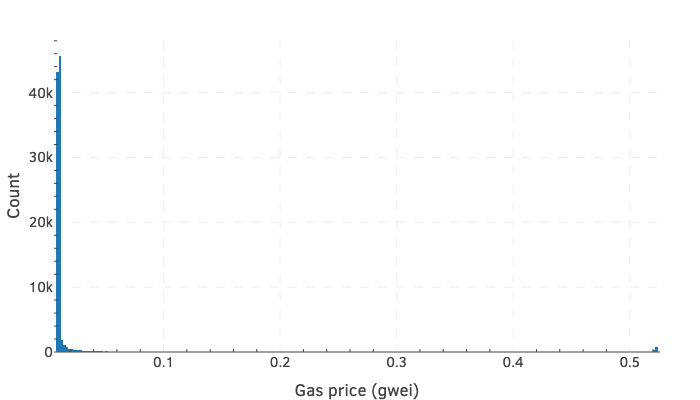

In [9]:
arb_df = gas_dist_df[gas_dist_df["blockchain"]=="arbitrum"]
X = arb_df["bucket_lower_bound"].values.reshape(-1, 1)
bandwidth = arb_df["bucket_lower_bound"].diff().mean()
weights = arb_df["bucket_cnt"].values
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X, sample_weight=weights)
samples = kde.sample(100000)

fig = px.histogram(samples, nbins=500, template=paper_template, height=400)
fig.update_layout(xaxis_title="Gas price (gwei)", yaxis_title="Count", showlegend=False)

fig.show('png')


### ZKsync

Note on ZKsync: For the most part, gas fee prices are fixed at 0.025 gwei. So, we may wish to use a fixed fee instead of the empirical distribution...

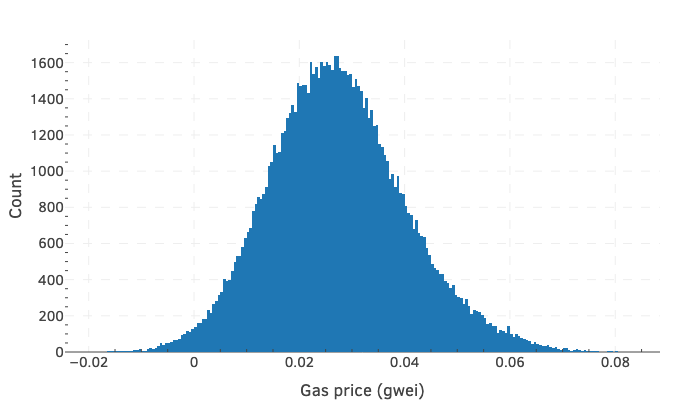

In [10]:
zksync_df = gas_dist_df[gas_dist_df["blockchain"]=="zksync"]
X = zksync_df["bucket_lower_bound"].values.reshape(-1, 1)
bandwidth = zksync_df["bucket_lower_bound"].diff().mean()
weights = zksync_df["bucket_cnt"].values
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X, sample_weight=weights)
samples = kde.sample(100000)

fig = px.histogram(samples, nbins=500, template=paper_template, height=400)
fig.update_layout(xaxis_title="Gas price (gwei)", yaxis_title="Count", showlegend=False)

fig.show('png')